In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv', index_col='Id')

In [5]:
seqs = {ix: pd.Series(x['Sequence'].split(',')) for ix, x in train.iterrows()}

# SeqSize

In [6]:
train['SeqSize'] = [len(seq) for seq in seqs.values()]

In [78]:
train['SeqSize10Bin'] = pd.cut(train.SeqSize, bins=10)

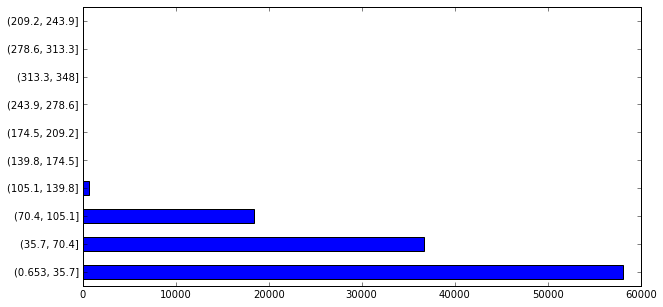

In [128]:
train.SeqSize10Bin.value_counts().plot(kind='barh', figsize=(10, 5))

# SeqValuesSizeMean/Max/Min

In [19]:
train['SeqValuesSizeMean'] = [seq.apply(lambda x: len(x)).mean() for seq in seqs.values()]
train['SeqValuesSizeMax'] = [seq.apply(lambda x: len(x)).max() for seq in seqs.values()]
train['SeqValuesSizeMin'] = [seq.apply(lambda x: len(x)).min() for seq in seqs.values()]

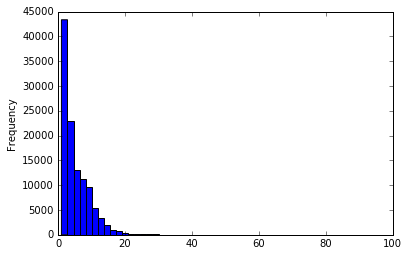

In [24]:
train.SeqValuesSizeMean.plot(kind='hist', bins=50)

# Mode

In [33]:
train['Mode'] = [seq.value_counts().idxmax() for seq in seqs.values()]

# Last value

In [24]:
train['LastValue'] = [seq.iloc[-1] for seq in seqs.values()]

# Last value == Mode

In [38]:
train['LastValueEqMode'] = train.apply(lambda x: x['LastValue'] == x['Mode'], axis=1)

In [91]:
train.LastValueEqMode.value_counts()

False    104405
True       9440
Name: LastValueEqMode, dtype: int64

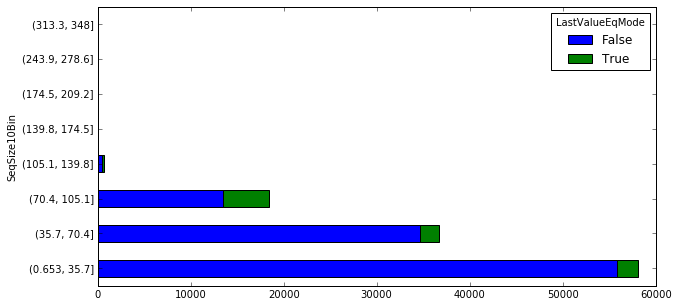

In [87]:
train.groupby(['LastValueEqMode', 'SeqSize10Bin']).SeqSize10Bin.count().unstack(0)\
.plot(kind='barh', stacked=True, figsize=(10, 5))

# NDifferentValues

In [126]:
train['NDifferentValues'] = [seq.value_counts().shape[0] for seq in seqs.values()]

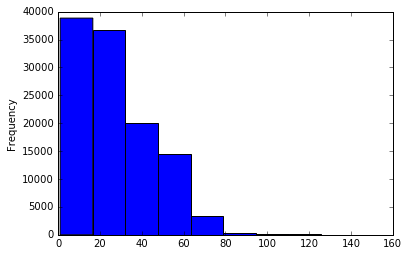

In [131]:
train.NDifferentValues.plot(kind='hist')

In [167]:
len(train[train['NDifferentValues'] == 1])

22

# SeqSize and NDifferentValues scatterplot

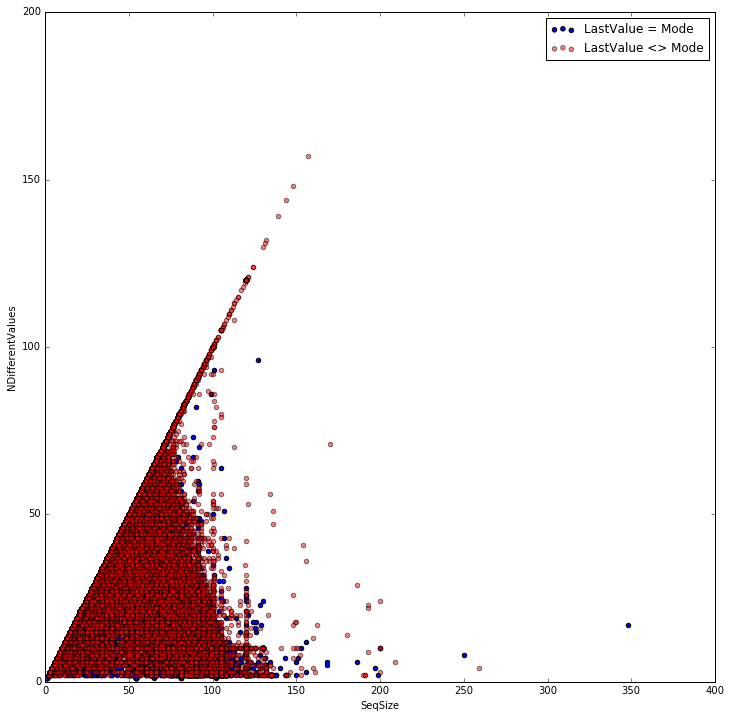

In [151]:
ax = train[train.LastValueEqMode]\
.plot(kind='scatter', x='SeqSize', y='NDifferentValues', color='Blue', figsize=(12, 12), \
      label='LastValue = Mode', xlim=(0, 400), ylim=(0, 200))
train[~train.LastValueEqMode]\
.plot(kind='scatter', x='SeqSize', y='NDifferentValues', color='Red', ax=ax, \
      label='LastValue <> Mode', alpha=.5)